# Dimensionality reduction 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('all/train.csv')

In [6]:
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [7]:
l=data['label']

In [8]:
m=data.drop(labels='label',axis=1)

In [9]:
print(l.shape)
print(m.shape)

(42000,)
(42000, 784)


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


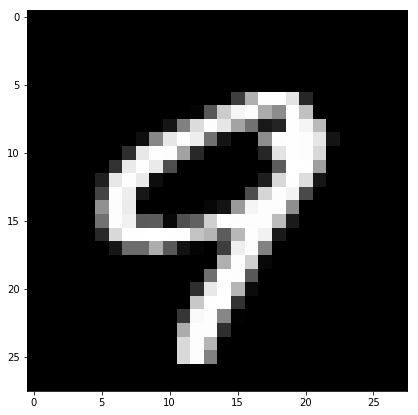

9


In [10]:
plt.figure(figsize=(7,7))
indx=100
grid_data=m.iloc[indx].as_matrix().reshape(28,28)
plt.imshow(X=grid_data,cmap='gray',interpolation='none')
plt.show()
print(l[indx])

# PCA

In [11]:
#pick first 15000 points
label=l.head(42000)
data=m.head(42000)
print('shape of sample data ',data.shape)

shape of sample data  (42000, 784)


In [12]:
#perform column standarization on sample data(datapreprocessing)
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)

In [13]:
print(standardized_data.shape)

(42000, 784)


In [14]:
sample_data=standardized_data

In [15]:
covariance_matrix=np.matmul(sample_data.T,sample_data)
print('covariance matrix shape is',covariance_matrix.shape)

covariance matrix shape is (784, 784)


In [16]:
#finding top two eigen values and eigen vector
#projecting onto a 2-D space
from scipy.linalg import eigh
#eigh return eigen values and eigen vector 
# eigen values are arrange in ascending order
# we wnat top 2 maximal variance
values,vectors=eigh(covariance_matrix,eigvals=(782,783))
print('shape of eigen vector=',vectors.shape)
vectors=vectors.T
#updated eigen vector shape
print('updated shape of  eigen vectors',vectors.shape)

shape of eigen vector= (784, 2)
updated shape of  eigen vectors (2, 784)


In [17]:
#project all data points onto  the plane 
#formed by two eigen vectors
resultant_matrix=np.matmul(vectors,sample_data.T)
print(resultant_matrix.shape)

(2, 42000)


In [18]:
import pandas as pd
new_cordinate=np.vstack((resultant_matrix,label)).T
dataframe=pd.DataFrame(data=new_cordinate,columns=['Ist principal component','2nd principal component','label'])
dataframe.head()

,Ist principal component,2nd principal component,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


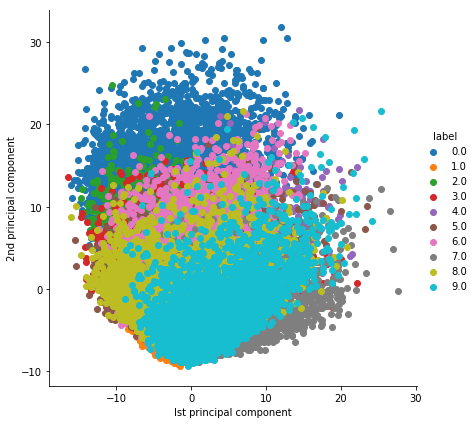

In [19]:
import seaborn as sns
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'Ist principal component','2nd principal component' ).add_legend()
plt.show()

# PCA Using sckitlearn

In [20]:
#initializing a pca
from sklearn import decomposition
pca=decomposition.PCA()

In [21]:
#configuring parameter
#no of component=2
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print('shape of pca_data',pca_data.shape)


shape of pca_data (42000, 2)


In [22]:
new_cordinate=np.vstack((pca_data.T,label)).T
pca_df=pd.DataFrame(data=new_cordinate,columns=['Ist principal component','2nd principal component','label'])
pca_df.head()

,Ist principal component,2nd principal component,label
0,-5.140427,-5.225311,1.0
1,19.292389,6.034271,0.0
2,-7.644530,-1.706371,1.0
3,-0.474201,5.836329,4.0
4,26.559606,6.025426,0.0


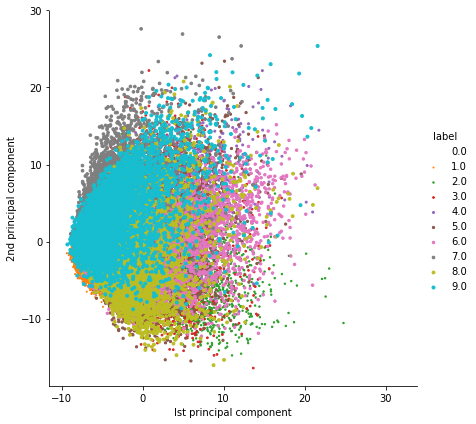

In [23]:
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'Ist principal component','2nd principal component','label').add_legend()
plt.show()

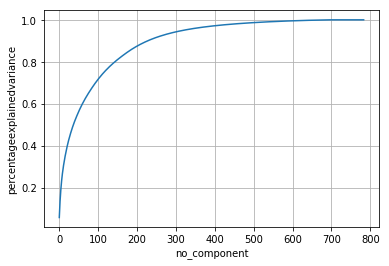

In [24]:
#pca for dimensionality reduction (non-visualization)
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_explainedvariance=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explain=np.cumsum(percentage_explainedvariance)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explain)
plt.xlabel('no_component')
plt.ylabel('percentageexplainedvariance')
plt.grid()
plt.axis('tight')
plt.show()


# T-SNE 

In [25]:
from sklearn.manifold import TSNE

In [26]:
labels_1000=l[0:1000]
data_1000=standardized_data[0:1000,:]


In [33]:
labels_1000.shape

(1000,)

In [27]:
model=TSNE(n_components=2,random_state=0)

In [28]:
tsne_data=model.fit_transform(data_1000)

In [35]:
tsne_data.T.shape

(2, 1000)

In [36]:
dataset=np.vstack((tsne_data.T,labels_1000.T)).T

In [38]:
df2=pd.DataFrame(dataset,columns=['ist component','2nd component','labels'])
df2.head()

,ist component,2nd component,labels
0,17.667805,-4.752292,1.0
1,-16.821486,47.243076,0.0
2,-2.111729,-5.705833,1.0
3,-20.582045,-13.494827,4.0
4,-15.543206,55.578388,0.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


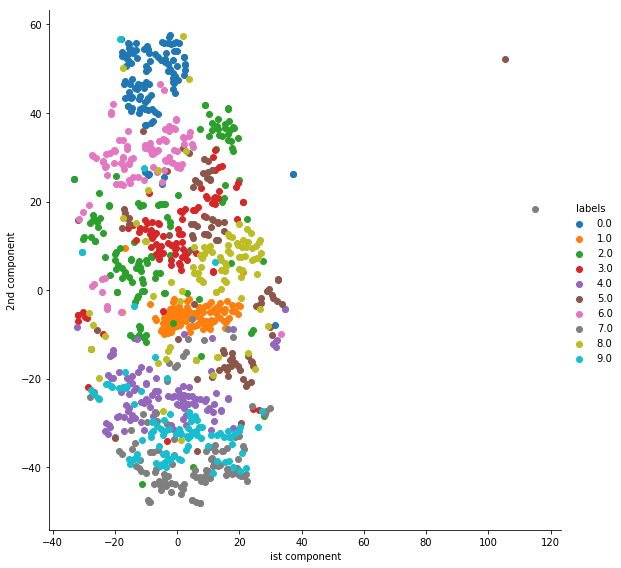

In [43]:
sns.FacetGrid(df2,hue='labels',size=8).map(plt.scatter,'ist component','2nd component').add_legend()